In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as s
from numpy import cos, sqrt, radians
import sklearn as sk

from sklearn.cluster import KMeans

In [43]:
raw_data = pd.read_csv("Data/merged_data_mass.csv")

In [44]:
raw_data.columns

Index(['Compounds', 'A sites', 'A site charge', 'A site mass',
       'Principle components of inertia', 'B sites', 'Elpasolite?',
       'B site charge', 'B1 site', 'B1 charge', 'B1 ionic radii', 'B1 mass',
       'B2 site', 'B2 charge', 'B2 ionic radii', 'B2 mass', 'X sites',
       'X site charge', 'X site length', 'X site mass', 'T c/K',
       'No. of phase transitions', 'Space groupa', 'Space group ref', 'a',
       'da', 'b', 'db', 'c', 'dc', 'alpha', 'dalpha', 'beta', 'dbeta', 'gamma',
       'dgamma', 'Ref.', 'DOI', 'alpha1', 'alpha2', 'alpha3', 'alphar',
       'alphatheta', 'Lmin', 'Lmed', 'Lmax', 'b_y'],
      dtype='object')

In [45]:
X1 = raw_data[['A site mass', 'B1 mass']]          #B1 Data

X2 = raw_data[['A site mass', 'B2 mass']]          #B2 Data

Text(0.5, 1.0, 'Elbow method: Finding Optimum Clusters')

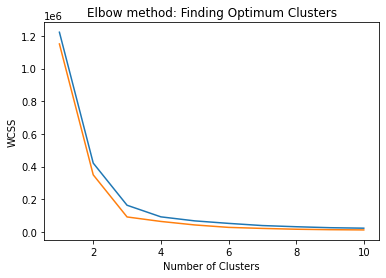

In [5]:
wcss1 = []
wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss1)
plt.plot(range(1, 11), wcss2)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method: Finding Optimum Clusters')

[]

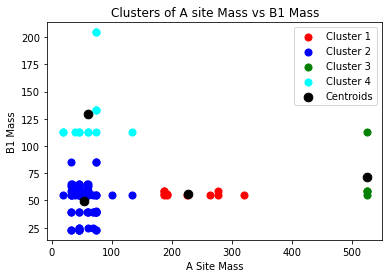

In [32]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)
y_kmeans1

plt.scatter(X1[y_kmeans1 == 0]['A site mass'], X1[y_kmeans1 == 0]['B1 mass'], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans1 == 1]['A site mass'], X1[y_kmeans1 == 1]['B1 mass'], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans1 == 2]['A site mass'], X1[y_kmeans1 == 2]['B1 mass'], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans1 == 3]['A site mass'], X1[y_kmeans1 == 3]['B1 mass'], s = 50, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'black', label = 'Centroids')

plt.title('Clusters of A site Mass vs B1 Mass')
plt.xlabel('A Site Mass')
plt.ylabel('B1 Mass')
plt.legend()
plt.plot()

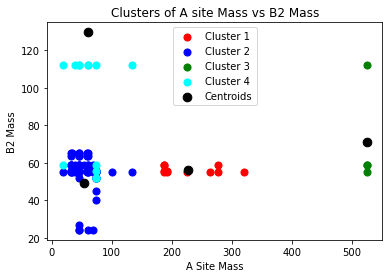

In [33]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans.fit_predict(X1)
y_kmeans2

plt.scatter(X2[y_kmeans2 == 0]['A site mass'], X2[y_kmeans2 == 0]['B2 mass'], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans2 == 1]['A site mass'], X2[y_kmeans2 == 1]['B2 mass'], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans2 == 2]['A site mass'], X2[y_kmeans2 == 2]['B2 mass'], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans2 == 3]['A site mass'], X2[y_kmeans2 == 3]['B2 mass'], s = 50, c = 'cyan', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'black', label = 'Centroids')

plt.title('Clusters of A site Mass vs B2 Mass')
plt.xlabel('A Site Mass')
plt.ylabel('B2 Mass')
plt.legend()

In [5]:
data = raw_data[['A sites', 'A site charge', 'A site mass', 'Elpasolite?',
       'B1 site', 'B1 charge', 'B1 ionic radii', 'B1 mass',
       'B2 site', 'B2 charge', 'B2 ionic radii', 'B2 mass',
       'X sites', 'X site charge', 'X site length', 'X site mass', 'T c/K',
       'Space groupa', 'a',
       'da', 'b', 'db', 'c', 'dc', 'alpha', 'dalpha', 'beta', 'dbeta', 'gamma',
       'dgamma', 'No. of phase transitions']].copy()

In [6]:
data

,A sites,A site charge,A site mass,Elpasolite?,B1 site,B1 charge,B1 ionic radii,B1 mass,B2 site,B2 charge,...,db,c,dc,alpha,dalpha,beta,dbeta,gamma,dgamma,No. of phase transitions
0,HIm,1,69.085331,True,K,1,152,39.098300,Fe,3,...,"0.007, 0.00011, 0.00017","15.125, 18.8197, 19.029","0.0014, 0.00019, 0.003","90, 90, 90","0, 0, 0","111.93, 90, 90","0.04,0, 0","90, 120, 120","0, 0 ,0",2
1,HIm,1,69.085331,True,K,1,152,39.098300,Co,3,...,"0.00017, 0.006, 0.00012","15.083, 18.709, 19.011","0.003, 0.001, 0.004","90.00, 90.00, 90.00","0, 0, 0","111.70, 90.00, 90.00","0.03, 0, 0","90.00, 120.00, 120.00","0, 0, 0",2
2,MA,1,32.065089,True,K,1,152,39.098300,Fe,3,...,"0.00018, 0.00015","13.703, 11.4770","0.003, 0.00015","90.00, 90.00","0, 0, 0","108.642 , 90.00","0.006, 0","90.00, 90.00","0, 0",1
3,MA,1,32.065089,True,Na,1,116,22.989769,Co,3,...,"0.004, 0.004","10.944, 11.003","0.004, 0.004","90, 90","0, 0","90, 90","0, 0","90, 90","0, 0",2
4,MA,1,32.065089,True,K,1,152,39.098300,Co,3,...,"0.0005, 0.006","13.6989, 11.454","0.0014, 0.006","90.00, 90.00","0, 0","108.71 , 90.00","0.04, 0","90.00, 90.00","0, 0",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,SPh3,1,263.377235,False,Mn,2,81,54.938044,Mn,2,...,0.0005,16.8605,0.0006,90,0,100.666,0.002,90,0,0
93,PPN,1,524.572394,False,Co,2,79,58.933194,Co,2,...,0.003,31.53,0.001,90,0,90,0,90,0,0
94,PPN,1,524.572394,False,Ni,2,83,58.693400,Ni,2,...,0.003,31.53,0.001,90,0,90,0,90,0,0
95,PPN,1,524.572394,False,Mn,2,81,54.938044,Mn,2,...,0.0003,20.6707,0.0004,90,0,92.5382,0.0001,90,0,0


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
dat = np.array(ct.fit_transform(data))

In [46]:
X1 = raw_data[['B1 ionic radii', 'B2 ionic radii']]          #B1 Data

X2 = raw_data[['B1 ionic radii', 'X site length']]          #B2 Data

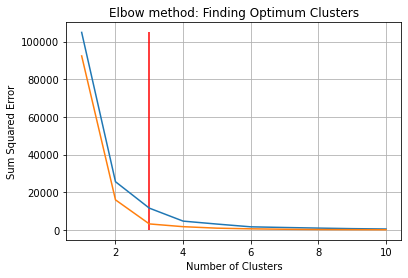

In [9]:
wcss1 = []
wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss1)
plt.plot(range(1, 11), wcss2)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error')
plt.title('Elbow method: Finding Optimum Clusters')
plt.grid(True)
plt.vlines(3, 0, 105000, colors='r', label='Optimum Number of Clusters')

[]

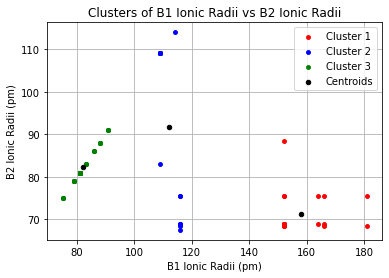

In [51]:
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans1.fit_predict(X1)
y_kmeans1

plt.scatter(X1[y_kmeans1 == 0]['B1 ionic radii'], X1[y_kmeans1 == 0]['B2 ionic radii'], s = 15, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans1 == 1]['B1 ionic radii'], X1[y_kmeans1 == 1]['B2 ionic radii'], s = 15, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans1 == 2]['B1 ionic radii'], X1[y_kmeans1 == 2]['B2 ionic radii'], s = 15, c = 'green', label = 'Cluster 3')
#plt.scatter(X1[y_kmeans1 == 3]['B1 ionic radii'], X1[y_kmeans1 == 3]['B2 ionic radii'], s = 15, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')

plt.title('Clusters of B1 Ionic Radii vs B2 Ionic Radii')
plt.xlabel('B1 Ionic Radii (pm)')
plt.ylabel('B2 Ionic Radii (pm)')
plt.legend()
plt.grid(True)
plt.plot()

[]

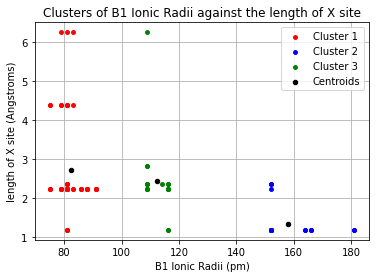

In [52]:
kmeans2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(X2)
y_kmeans2

plt.scatter(X2[y_kmeans2 == 0]['B1 ionic radii'], X2[y_kmeans2 == 0]['X site length'], s = 15, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans2 == 1]['B1 ionic radii'], X2[y_kmeans2 == 1]['X site length'], s = 15, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans2 == 2]['B1 ionic radii'], X2[y_kmeans2 == 2]['X site length'], s = 15, c = 'green', label = 'Cluster 3')
#plt.scatter(X2[y_kmeans2 == 3]['B1 ionic radii'], X2[y_kmeans2 == 3]['X site length'], s = 15, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')

plt.title('Clusters of B1 Ionic Radii against the length of X site')
plt.xlabel('B1 Ionic Radii (pm)')
plt.ylabel('length of X site (Angstroms)')
plt.legend()
plt.grid(True)
plt.plot()

[]

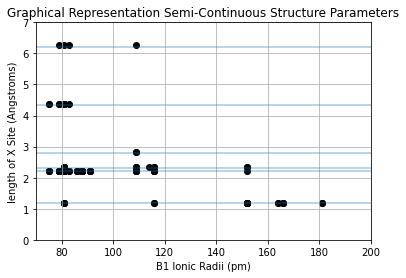

In [48]:
fig = plt.plot(figsize=(10,10))
plt.scatter(raw_data['B1 ionic radii'], raw_data['X site length'], color='k')
plt.title('Graphical Representation Semi-Continuous Structure Parameters')
plt.xlabel('B1 Ionic Radii (pm)')
plt.ylabel('length of X Site (Angstroms)')
plt.ylim(0, 7)
plt.xlim(70, 200)
plt.grid(True)

plt.hlines(6.2, 70, 200, alpha=0.4)
plt.hlines(4.35, 70, 200, alpha=0.4)
plt.hlines(2.8, 70, 200, alpha=0.4)
plt.hlines(2.3, 70, 200, alpha=0.4)
plt.hlines(2.2, 70, 200, alpha=0.4)
plt.hlines(1.2, 70, 200, alpha=0.4)
plt.plot()